## Introduction

As part of my project in my dataquest learning journey, i would be working to analyze this dataset. My goal is to find out the major contributors to the high traffic situations, find insights that helps address these situations and proffer recommendations on hat to do to mitigate the effect. The following are what the columns represent:

holiday - categorical US national holidays plus regional holiday, Minnesota State Fair

temp - numeric average temperature in kelvin

rain_1h - numeric amount of mm of rain that occured in 1 hour

snow_1h - numeric amount of mm of snow that occured in 1 hour

clouds_all - numeric percentage of cloud cover

weather_main - categorical short textual description of the current weather

weather_description - categorical longer textual description of the current weather

date_time - date, time and hour the data was collected in local CST time

Traffic_volume - numeric hourly I-94 ATR (average traffic rate) 301 reported westbound traffic volume

The dataset for this analysis can be downloaded by clicking [here](https://community.dataquest.io/uploads/short-url/eajT9MWXAMS35OGNyxVz8F10w7v.ipynb)

## Importing Pandas
Let's import pandas and use it to import our dataset into python

In [1]:
import pandas as pd
MITV = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

## Exploring the dataset
We will print the first and last few rows of the dataset to understand what the different columns contain. Also to know the data types of each the columns will be examined for the information. This helps us understand how to treat each column and what adjustments to make.

In [2]:
print(MITV.head(5))
print(MITV.tail(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [3]:
MITV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Visualizing the traffic frequency
This summarizes the traffic situation on the road giving us an understanding of the most frequent number of cars on the road in our dataset.

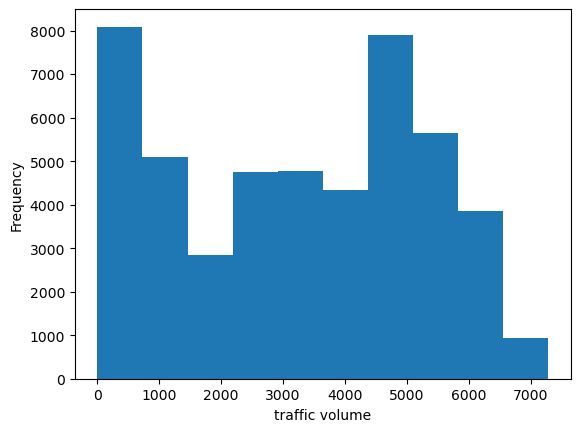

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
MITV['traffic_volume'].plot.hist()
plt.xlabel('traffic volume')
plt.show()

The visualization shows that at most times of the days there are between 0 the 800 cars and 4500 to 5000 cars on the road. The figure at the lower end (0 to 800) is likely due to the hours of the day (late nights and early mornings) when most/all people are at home rsting/sleeping. Overall, the traffic is usually high during the day.

## Examining the Traffic Volume Column
Let's confirm that what we learnt from the visualization is true by exploring the traffic volume column

In [5]:
MITV['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Converting the date to a Python date format
This is to allow us manipulate the date in a way that we can analyze the traffic situations at different hours of the day

In [6]:
MITV['date_time'] = pd.to_datetime(MITV['date_time'])

## Extracting the hours from the date and using it to group the columns into day and night:
For this analysis we will take 7am to 6:59pm to be the day-time while 7pm to 6:59 will be night-time

In [7]:
day_time = MITV.copy()[(MITV['date_time'].dt.hour >= 7) &
                      (MITV['date_time'].dt.hour < 19)]
print(day_time.shape)
night_time = MITV.copy()[(MITV['date_time'].dt.hour >= 19) |
                      (MITV['date_time'].dt.hour < 7)]
print(night_time.shape)
day_time

(23877, 9)
(24327, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


## Comparing the traffic volume between the day and night using a plot
For more granularity and understanding of the traffic volumes at different times of the day we will visualize the data for day-time and night-time

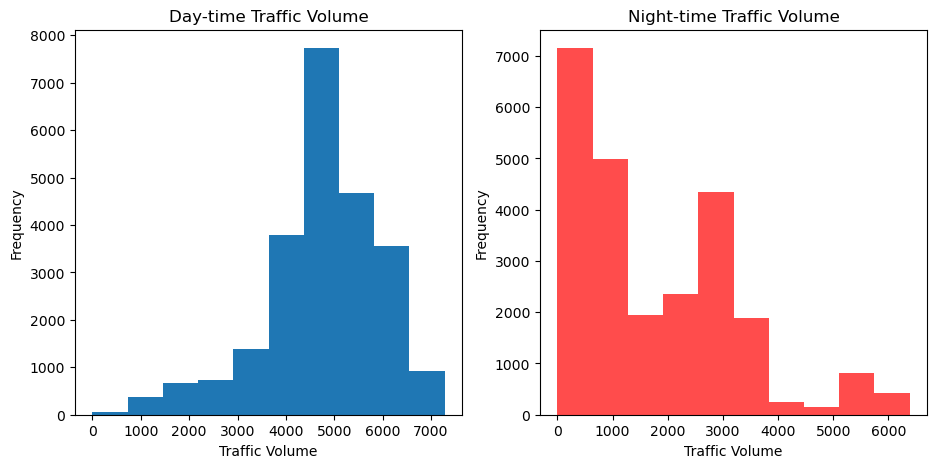

In [8]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.title('Day-time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'], color='red', alpha=0.7)
plt.title('Night-time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

The day-time plot is skewed to the left and shows that the traffic volume is mostly high during day-time while the night-time plot is skewed to the right and shows that the traffic volume is mostly low at night-time

## Finding the average monthly traffic volume
It would be helpful to know if there is a trend in the monthly traffic. This helps us understand the months that contributes more to the traffic.

In [9]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2035601682.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day_time.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

## Visualizing the result
Let's visualize the data for easy interpretability

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1748426996.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])


Text(0.5, 1.0, 'Traffic Volume by Months')

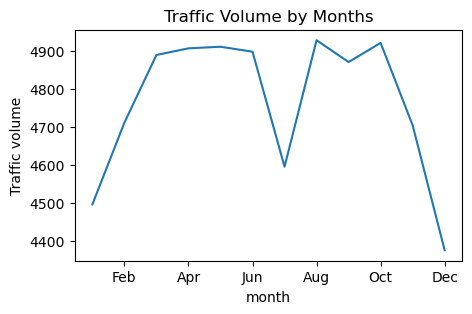

In [29]:
fig, ax = plt.subplots(figsize=(5, 3))
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic volume')
ax.set_xticklabels(['', 'Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
plt.title('Traffic Volume by Months')

### The plot shows that traffic are relatively lighter in January, February, July and December

## Changing the perspective of the plot

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1172875301.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Feb', 'Apr', 'jun', 'Aug', 'Oct', 'Dec'])


Text(0.5, 1.0, 'Traffic Volume by Months (adjusted)')

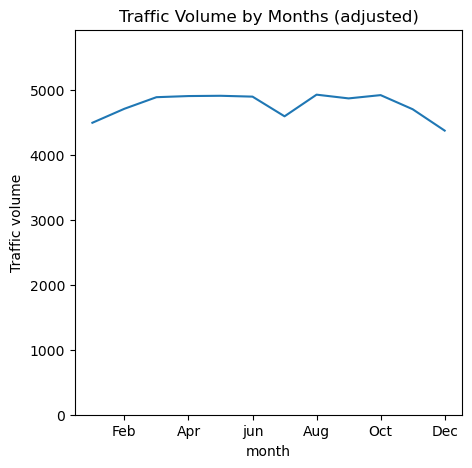

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic volume')
ax.set_xticklabels(['', 'Feb', 'Apr', 'jun', 'Aug', 'Oct', 'Dec'])
plt.ylim(0, by_month['traffic_volume'].max()+1000)
plt.title('Traffic Volume by Months (adjusted)')

With the new plot we can see that our initial thought that the change is big for the specified months above is false. Its shows a difference but not has nig as the first plot depicted

## Finding the average weekly traffic volume

In [12]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1471914992.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day_time.groupby('dayofweek').mean()


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

## Visualizing the result:
The day of the week are; 0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday, 6 - Sunday

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1112716982.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


Text(0.5, 1.0, 'Traffic Volume by days of week')

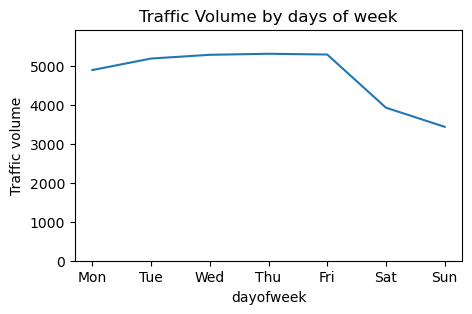

In [13]:
fig, ax = plt.subplots(figsize=(5, 3))
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic volume')
ax.set_xticklabels(['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim(0, by_month['traffic_volume'].max()+1000)
plt.title('Traffic Volume by days of week')

The result shows that generally on weekends the traffic volume are significantly less

## Grouping the weekdays into business days and weekends
We will group the days into weekdays when people go to work and weekends when people do not to further understand the traffic pattern. Also, a column for hours of the day will be created to help us plot a graph that shows the relationship between the grouped days and the traffic volume at different hours

In [14]:
day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek'] <= 4 ]
weekends_days = day_time.copy()[day_time['dayofweek'] > 4 ]
business_by_hour = business_days.groupby('hour').mean()
weekends_by_hour = weekends_days.groupby('hour').mean()
print(business_by_hour['traffic_volume'].describe())
print(weekends_by_hour['traffic_volume'].describe())

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64
count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2007412803.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  business_by_hour = business_days.groupby('hour').mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2007412803.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekends_by_hour = weekends_days.groupby('hour').mean()


## Visualizing the plot for the grouped days
This helps us to understand our calculations above with a pictorial view

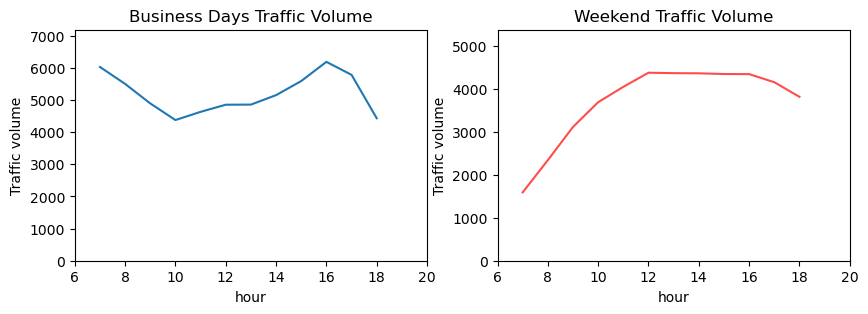

In [15]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
business_by_hour['traffic_volume'].plot.line()
plt.ylabel('Traffic volume')
plt.xlim(6, 20)
plt.ylim(0, business_by_hour['traffic_volume'].max()+1000)
plt.title('Business Days Traffic Volume')

plt.subplot(1, 2, 2)
weekends_by_hour['traffic_volume'].plot.line(color='red', alpha=0.7)
plt.ylabel('Traffic volume')
plt.xlim(6, 20)
plt.ylim(0, weekends_by_hour['traffic_volume'].max()+1000)
plt.title('Weekend Traffic Volume')
plt.show()

The plot shows the following:
1. The traffic volume on business days are generally much higher than on weekends.
2. Traffic tends to build up during the business days at 7am and gradually reduces till 10am. From 10am it rises till 4pm and gradually goes down till 6pm when it finally ends.
3. On the business days the traffic is at its peak at 7am and 4pm. Its at its lowest at 10am and 6pm
4. On weekends the traffic is usually at the lowest around the early ours of the morning (7 to 9am) and gradually increase till 12pm where it reaches its peak.
5. There tend to be high volume of traffic from 12am till 5pm.

## FInding the correlation between the traffic volume and weathers

In [16]:
day_time.copy().corr()['traffic_volume']

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2693423140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_time.copy().corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The daysofweek column has the strongest correlation among other weather columns. However, we have already performed analysis to understand this column. Aside the daysofweek column all other columns show weak correlation. Let's visualize the temp column which showed a weak correlation but is the highest amongst the others.

## plotting a scatter plot to visualize the relationship between temp and traffic volume

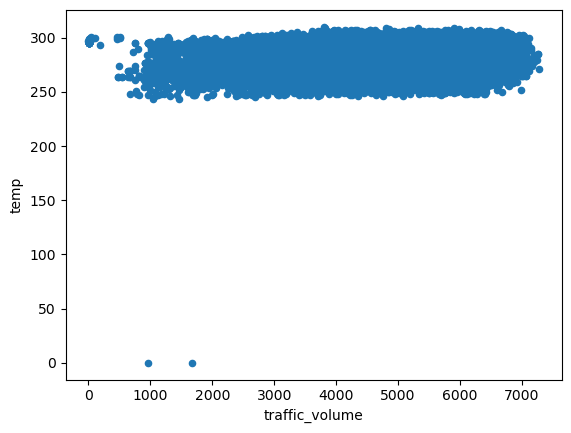

In [17]:
day_time.plot.scatter('traffic_volume', 'temp')
plt.show()

Apart from the two extreme cold weather that signifies a reduction in traffic volume, there seem to be no other indicator of traffic level

## Analyzing the categorical columns
Aggregating by weather_main and weather_description columns

In [18]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2588128372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day_time.groupby('weather_main').mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15716\2588128372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day_time.groupby('weather_description').mean()


## Plotting a horizontal bar chart for weather_main column

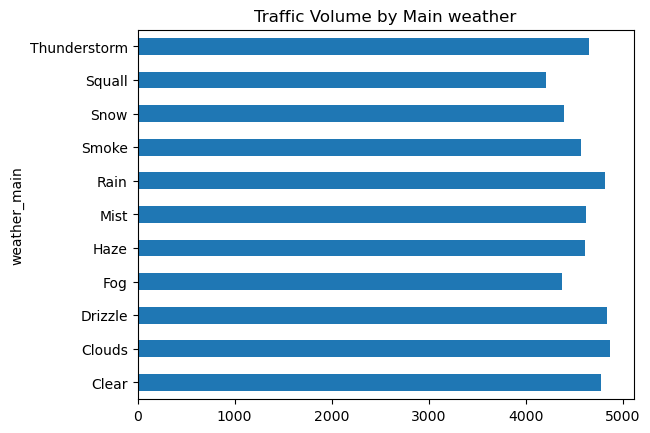

In [19]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Main weather')
plt.show()

The weather_main column which shows data for the main weather does not show any real difference between the weathers so it is difficult to find any valuable insight here.

## Plotting a horizontal bar chart for weather_description column
This adds more granularity to using the weather to draw insight from the dataset

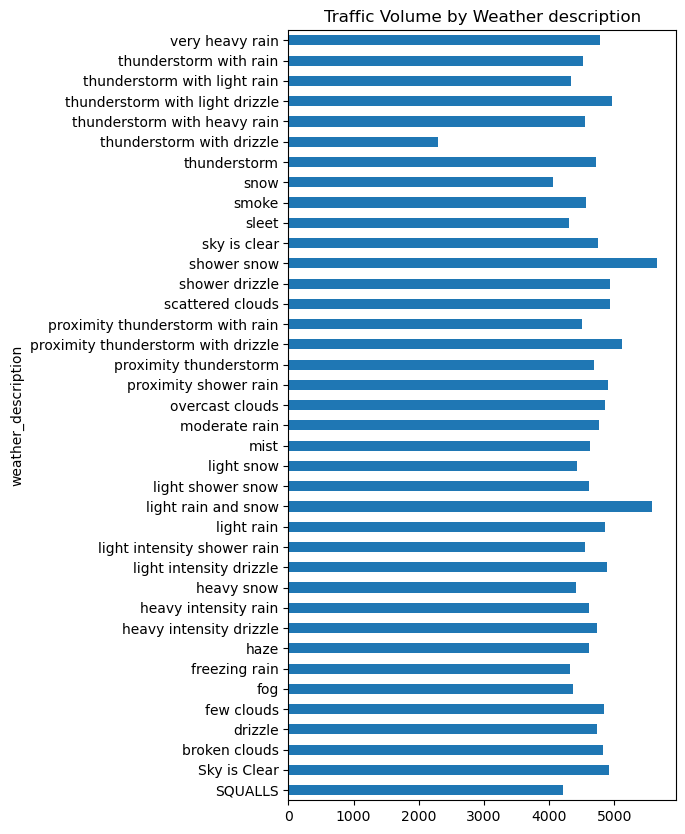

In [20]:
plt.figure(figsize=(5, 10))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather description')
plt.show()

The bar chart shows the following:
1. On days when there is light rain and snow and on days when there is shower snow, the traffic volume is at the highest, exceeding 5000 cars.
2. Traffic volume is at the lowest when there is thunderstorm with drizzle. There is an average volume of 2500 on such days

Text(0, 0.5, 'Traffic volume')

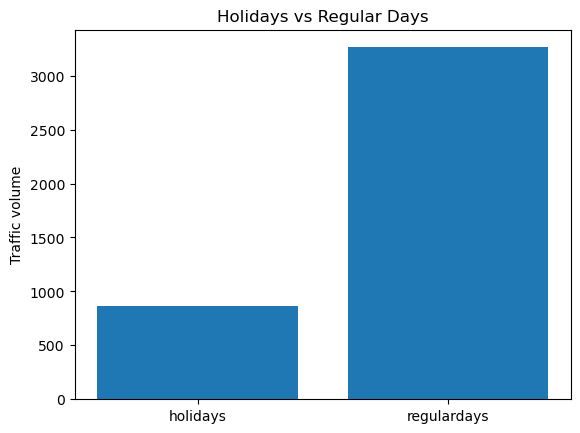

In [21]:
MITV['holiday'].unique()
regulardays = MITV[MITV['holiday'] == 'None']['traffic_volume'].mean()
holidays = MITV[MITV['holiday'] != 'None']['traffic_volume'].mean()
import numpy as np
array = np.array([holidays, regulardays])
plt.bar(['holidays', 'regulardays'], array)
plt.title('Holidays vs Regular Days')
plt.ylabel('Traffic volume')

As expected their are usually significantly less traffic during the holidays with the average traffic volume being under 1000 and that of regular days being above 3000

## Checking the number of holidays that are observed during the day and night
This gives credibility to our analysis above and know the number of observations used to arrive at the calculation

In [22]:
print('day time')
print(day_time['holiday'].value_counts())
print('\n')
print('night time')
print(night_time['holiday'].value_counts())

day time
None    23877
Name: holiday, dtype: int64


night time
None                         24266
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64


All of the holidays are observed at night. This makes it clearer as to why the average is significantly lower for days that holidays are observed. This is not necessarily due to the holidays but because the holidays are observed at night when traffic is usually low.

## Conclusion

Its been an interesting journey trying to find a meaning insight in the data and drawing relevant conclusions. One thing that has occurred throughout the analysis is the problem of huge daily traffic volume on the road. However, we were able to also discover periods when the traffic is relatively low and can be avoided completely. The findings will further be summarized below in the recommendation.

## Recommendations

We have been able to find some insights that will inform our decision to avoid the traffic situation on the road. Below a list of the insights gathered is summarized.
1. Traffic situations are usually lower during months like December, January februrary and July. However, the difference in traffic volume is not enough to have significant impact. So, instead we will look to take advantage of the following:
2. Hours below 7am. Generally huge traffic begins at around 7am. If people drive before this period they will be able to avoid the heavy traffic.
3. Weekends. During the weekend there is usually no traffic situation before 12pm and after 4pm. These are times that can be taken advantage of.
4. "Thunderstorm with drizzle" weather. Our plot revealed that this is the most favourable time to use the road as there are significantly less traffic volume while you want to avoid going out when there is light rain and snow as that is the time when the traffic volume is at the highest.